<a href="https://colab.research.google.com/github/ifmankim/bike/blob/main/Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyek Analisis Data: Bike Sharing Dataset

- Nama: Arief Rachman Hakim
- Email: arief.rachmanh2000@gmail.com
- Id Dicoding: ifman2000

##Menentukan Pertanyaan Bisnis

- Bagaimana Performa Perentalan sepeda dalam beberapa bulan terakhir berdasarkan type pelanggan?
- Pada musim apa orang-orang sering menggunakan sepeda ?
- Pukul berapa terjadi fluktuasi tingkat penyewaan?

##Menyiapkan semua library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## Data Wrangling

###Gathering Data

In [ ]:
day_df = pd.read_csv('https://raw.githubusercontent.com/ifmankim/bike/main/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/ifmankim/bike/main/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel day

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.duplicated().sum()

0

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Menilai Tabel Hour

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.duplicated().sum()

0

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Mengganti value season dari 1,2,3,4 menjadi Spring, Summer, Fall, Winter

In [ ]:
seasons = pd.DataFrame(hour_df)
seasons_r = np.array(['Spring','Summer','Fall','Winter'])
seasons['season'] = seasons['season'].replace([1,2,3,4], seasons_r)
seasons.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Membersihkan tabel hour_df

##### Memperbaiki tipe data

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(2)
memory usage: 2.3+ MB


In [ ]:
datetime_col = ['dteday']
for column in datetime_col:
  hour_df[column] = pd.to_datetime(hour_df[column])

#### Membersihkan tabel day_df

##### Memperbaiki tipedata day_df

In [ ]:
datetime_col = ['dteday']

for col in datetime_col:
  day_df[col] = pd.to_datetime(day_df[col])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore Hour_df

In [ ]:
hour_df.sample(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4626,4627,2011-07-16,Fall,0,7,16,0,6,0,1,0.76,0.6818,0.45,0.2836,183,242,425
10663,10664,2012-03-25,Summer,1,3,10,0,0,0,2,0.40,0.4091,0.87,0.3284,78,172,250
5342,5343,2011-08-15,Fall,0,8,12,0,1,1,1,0.74,0.6818,0.58,0.2836,62,116,178
12939,12940,2012-06-28,Fall,1,6,8,0,4,1,1,0.66,0.6212,0.50,0.1343,40,577,617
8870,8871,2012-01-10,Spring,1,1,11,0,2,1,1,0.42,0.4242,0.38,0.2985,8,93,101
11992,11993,2012-05-19,Summer,1,5,21,0,6,0,1,0.64,0.6212,0.50,0.0000,81,178,259
1708,1709,2011-03-16,Spring,0,3,20,0,3,1,2,0.42,0.4242,0.54,0.2985,10,111,121
6085,6086,2011-09-16,Fall,0,9,3,0,5,1,1,0.40,0.4091,0.71,0.2537,2,4,6
4022,4023,2011-06-21,Fall,0,6,12,0,2,1,1,0.70,0.6667,0.74,0.1642,40,149,189
6961,6962,2011-10-22,Winter,0,10,16,0,6,0,1,0.50,0.4848,0.45,0.1940,169,190,359


In [ ]:
day_df.describe(include="all")

<ipython-input-16-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [ ]:
day_df.instant.is_unique

True

#### Jumlah Rent Berdasarkan Season

In [ ]:
day_df.groupby(by="season").agg({
    "instant":"nunique",
    "cnt":"sum"
})

,instant,cnt
season,,
1,181,471348
2,184,918589
3,188,1061129
4,178,841613


In [ ]:
day_df.groupby(by=["yr","season"]).agg({
    "instant":"nunique",
    "cnt":["max","min","mean","std"]
})

instant   cnt                                
          nunique   max   min         mean          std
yr season                                              
0  1           90  3239   431  1666.666667   614.012663
   2           92  5805   795  3775.173913  1138.901028
   3           94  6043  1115  4464.361702   798.348077
   4           89  5511   627  3664.460674   983.006128
1  1           91  7836   441  3531.296703  1341.203270
   2           92  8362  1027  6209.489130  1221.345569
   3           94  8714  4073  6824.244681   912.756191
   4           89  8555    22  5791.865169  1598.520901

#### Jumlah Rent Berdasarkan Type Pelanggan

In [ ]:
day_df.groupby(by=["yr","season"]).agg({
    "instant":"nunique",
    "casual":"sum",
    "registered":"sum"
})

instant  casual  registered
yr season                             
0  1            90   21425      128575
   2            92   77564      269752
   3            94   95450      324200
   4            89   52813      273324
1  1            91   39197      282151
   2            92  125958      445315
   3            94  130641      510838
   4            89   76969      438507

## Visualization & Explanatory Analysis

### Bagaimana Performa Perentalan sepeda dalam beberapa bulan terakhir berdasarkan type pelanggan?

#### Analisis dan Visualisasi

In [ ]:
monthly_rent_df = hour_df.resample(rule='M', on='dteday').agg({
    "instant":"nunique",
    "casual":"sum",
    "yr": lambda x: x.value_counts().get(1,0),
    "registered":"sum"
})

monthly_rent_df.index = monthly_rent_df.index.strftime('%Y-%m')
monthly_rent_df = monthly_rent_df.reset_index()
monthly_rent_df.rename(columns={
    "instant":"order_count",
    "casual":"casual_customer",
    "registered":"member_customer"
}, inplace=True)
monthly_rent_df.head(24)

,dteday,order_count,casual_customer,yr,member_customer
0,2011-01,688,3073,0,35116
1,2011-02,649,6242,0,41973
2,2011-03,730,12826,0,51219
3,2011-04,719,22346,0,72524
4,2011-05,744,31050,0,104771
5,2011-06,720,30612,0,112900
6,2011-07,744,36452,0,104889
7,2011-08,731,28842,0,107849
8,2011-09,717,26545,0,100873
9,2011-10,743,25222,0,98289


In [ ]:
#2011 Registered
monthly_rent_2011_df = monthly_rent_df.loc[monthly_rent_df['yr'] == 0]
monthly_rent_2011_df.head(12)

,dteday,order_count,casual_customer,yr,member_customer
0,2011-01,688,3073,0,35116
1,2011-02,649,6242,0,41973
2,2011-03,730,12826,0,51219
3,2011-04,719,22346,0,72524
4,2011-05,744,31050,0,104771
5,2011-06,720,30612,0,112900
6,2011-07,744,36452,0,104889
7,2011-08,731,28842,0,107849
8,2011-09,717,26545,0,100873
9,2011-10,743,25222,0,98289


In [ ]:
#2012 Registered
monthly_rent_2012_df = monthly_rent_df.loc[monthly_rent_df['yr'] != 0]
monthly_rent_2012_df.head(12)

,dteday,order_count,casual_customer,yr,member_customer
12,2012-01,741,8969,741,87775
13,2012-02,692,8721,692,94416
14,2012-03,743,31618,743,133257
15,2012-04,718,38456,718,135768
16,2012-05,744,44235,744,151630
17,2012-06,720,43294,720,159536
18,2012-07,744,41705,744,161902
19,2012-08,744,43197,744,171306
20,2012-09,720,43778,720,174795
21,2012-10,708,34538,708,164303


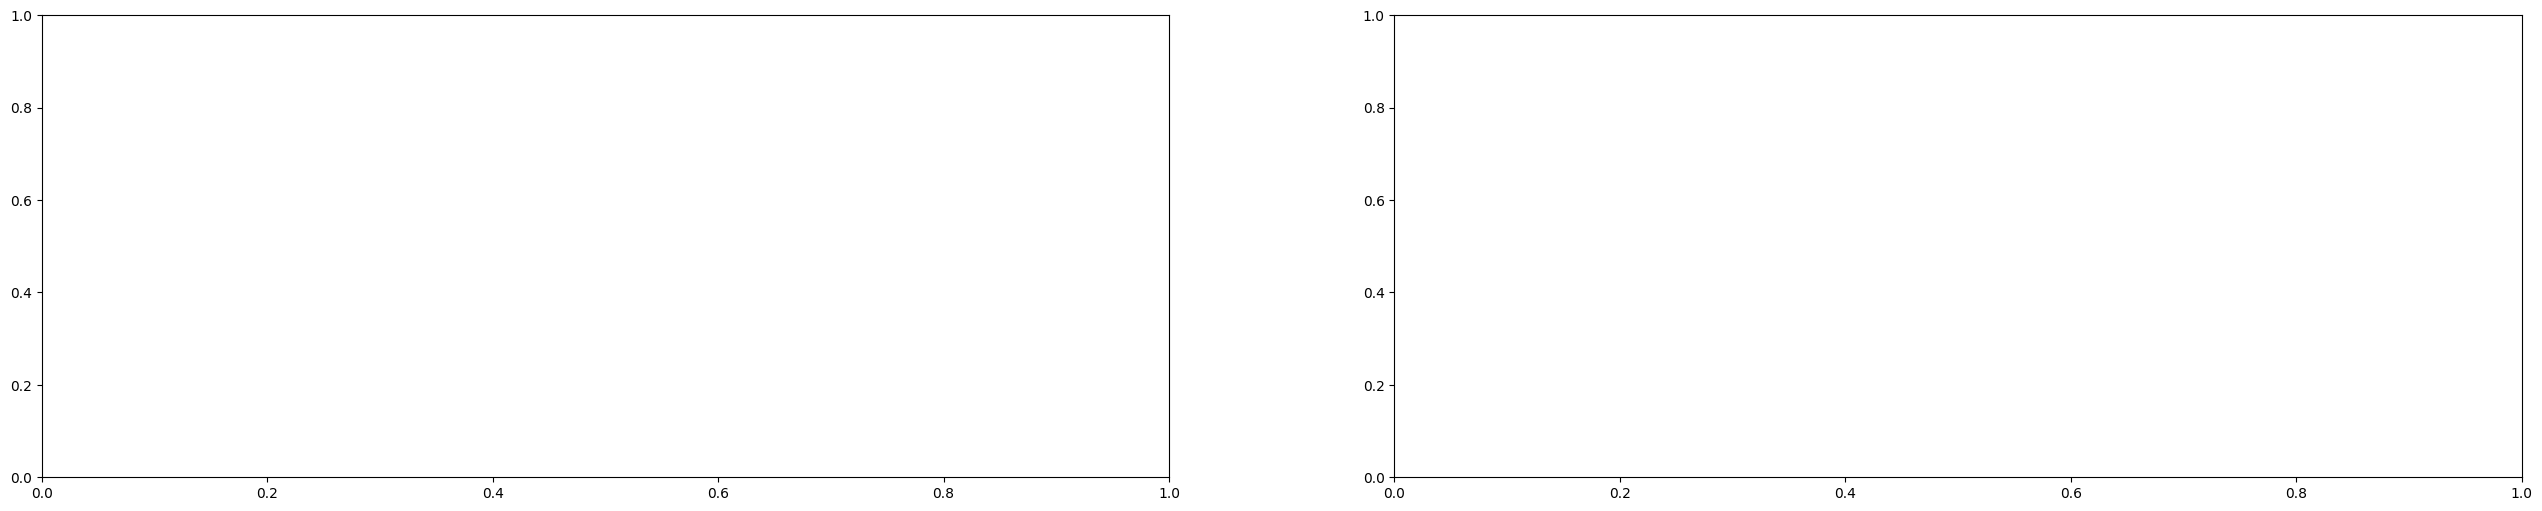

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))

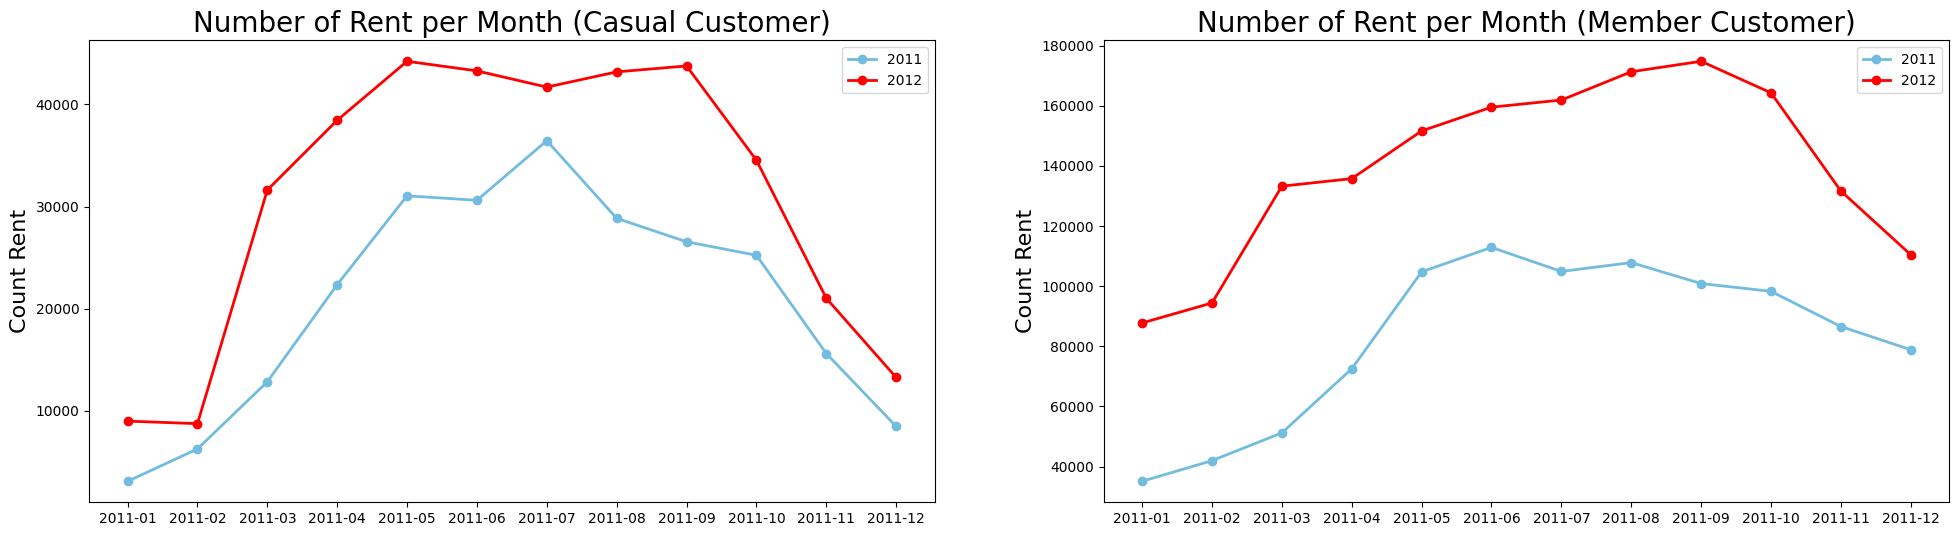

<Figure size 1600x500 with 0 Axes>

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
plt.figure(figsize=(16, 5))
ax[0].plot(monthly_rent_2011_df['dteday'], monthly_rent_2011_df['casual_customer'], marker='o', linewidth=2, label="2011", color="#72BCDF")
ax[0].plot(monthly_rent_2011_df['dteday'], monthly_rent_2012_df['casual_customer'], marker='o', linewidth=2, label="2012",color="red")
ax[0].set_title("Number of Rent per Month (Casual Customer)", loc="center", fontsize=20)
ax[0].set_xlabel(None)
ax[0].set_ylabel('Count Rent', fontsize=16)
ax[0].legend()

ax[1].plot(monthly_rent_2011_df['dteday'], monthly_rent_2011_df['member_customer'], marker='o', linewidth=2, label="2011", color="#72BCDF")
ax[1].plot(monthly_rent_2011_df['dteday'], monthly_rent_2012_df['member_customer'], marker='o', linewidth=2, label="2012",color="red")
ax[1].set_title("Number of Rent per Month (Member Customer)", loc="center", fontsize=20)
ax[1].set_xlabel(None)
ax[1].set_ylabel('Count Rent', fontsize=16)
ax[1].legend()
plt.show()

#### Kesimpulan

**Casual Customer**
Berdasarkan visualisasi tersebut, kita dapat melihat bahwa terdapat kenaikan jumlah peminjaman sepeda pada tahun 2012 dibandingkan dengan tahun sebelumnya. Jika dilihat pada visualisasi sebelah kiri yaitu visualisasi casual customer ternyata customer cenderung melakukan peminjaman sepeda pada bulan mei sampai september yang merupakan musim panas dan mengalami penurunan yang cukup signifikan pada bukan oktober hingga februari karena pada bulan itu sudah memasuki musim dingin dan menjelang menuju musim semi yang dimana orang-orang lebih suka mengurangi aktifitas diluar ruangan.

**Member Customer**
Sedangkan untuk member customer yang divisualisasikan disebelah kanan terjadi perbedaan tingkat peminjaman sepeda. Untuk member customer ternyata kebanyakan customer melakukan peminjaman dibulan agustus hingga oktober yang merupakan musim gugur. Sama seperti casual customer, member customer juga mengalami penurunan di musim salju dan musim semi.

### Pada musim apa orang-orang sering merental sepeda ?

#### Analisis dan Visualisasi

In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
sum_seasonal_df = hour_df.groupby(by="season").cnt.sum().reset_index()
sum_seasonal_df.head()

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


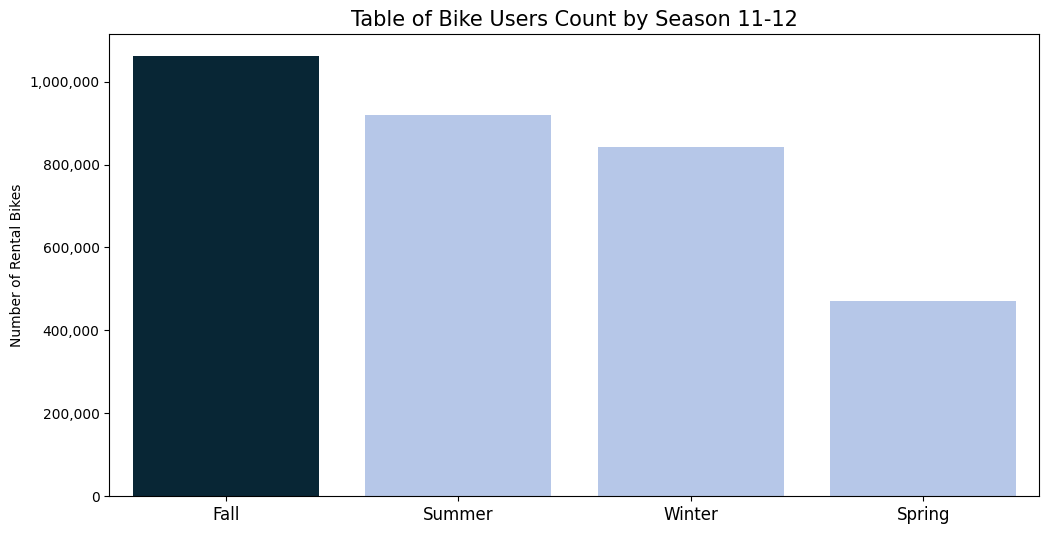

In [ ]:
#Visualisasi
byseasonal_df = hour_df.groupby(by="season").cnt.sum().reset_index()
byseasonal_df.rename(columns={
    "cnt":"total_rental_bikes"
})

plt.figure(figsize=(12,6))
colors=['#00283c','#adc4f1','#adc4f1','#adc4f1']

sns.barplot(
  y="cnt",
  x="season",
  data=byseasonal_df.sort_values(by="cnt", ascending=False),
  palette=colors
)

plt.title("Table of Bike Users Count by Season 11-12", loc="center", fontsize=15)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel("Number of Rental Bikes")
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

#### Kesimpulan

Berdasarkan analisis tersebut ternyata jumlah customer yang meminjam sepeda pada tahun 2011-2012, musim gugur merupakan musim yang paling banyak orang-orang melakukan peminjaman sepeda, yang disusul oleh musim panas. Hal ini sejalan dengan visual yang sebelumnya kita lihat musim panas dan gugur sama-sama memiliki jumlah peminjaman terbesar.

###Pukul berapa terjadi fluktuasi tingkat penyewaan?

#### Analisis dan Visualisasi

In [ ]:
sum_hour_df = hour_df.groupby(by=["yr","hr"]).cnt.sum().reset_index()
sum_hour_df.head(48).sort_values(by="cnt", ascending=False)

,yr,hr,cnt
41,1,17,209228
42,1,18,192787
32,1,8,165534
40,1,16,142126
43,1,19,140987
17,0,17,127632
18,0,18,116985
37,1,13,115580
36,1,12,115216
39,1,15,114559


In [ ]:
#Tahun 2011
sum_hour_df_yr_0 = sum_hour_df.loc[sum_hour_df['yr'] == 0]
sum_hour_df_yr_0.sort_values(by="cnt", ascending=False).head(5)

,yr,hr,cnt
17,0,17,127632
18,0,18,116985
8,0,8,95467
19,0,19,85802
16,0,16,85622


In [ ]:
#Tahun 2012
sum_hour_df_yr_1 = sum_hour_df.loc[sum_hour_df['yr'] == 1]
sum_hour_df_yr_1.sort_values(by="cnt", ascending=False).head(5)

,yr,hr,cnt
41,1,17,209228
42,1,18,192787
32,1,8,165534
40,1,16,142126
43,1,19,140987


In [ ]:
#Konversi Hours ke String
sum_hour_df_yr_0['hr']=sum_hour_df_yr_0['hr'].astype(str)
sum_hour_df_yr_1['hr']=sum_hour_df_yr_1['hr'].astype(str)

<ipython-input-32-2ac5343d3ebf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_hour_df_yr_0['hr']=sum_hour_df_yr_0['hr'].astype(str)
<ipython-input-32-2ac5343d3ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_hour_df_yr_1['hr']=sum_hour_df_yr_1['hr'].astype(str)


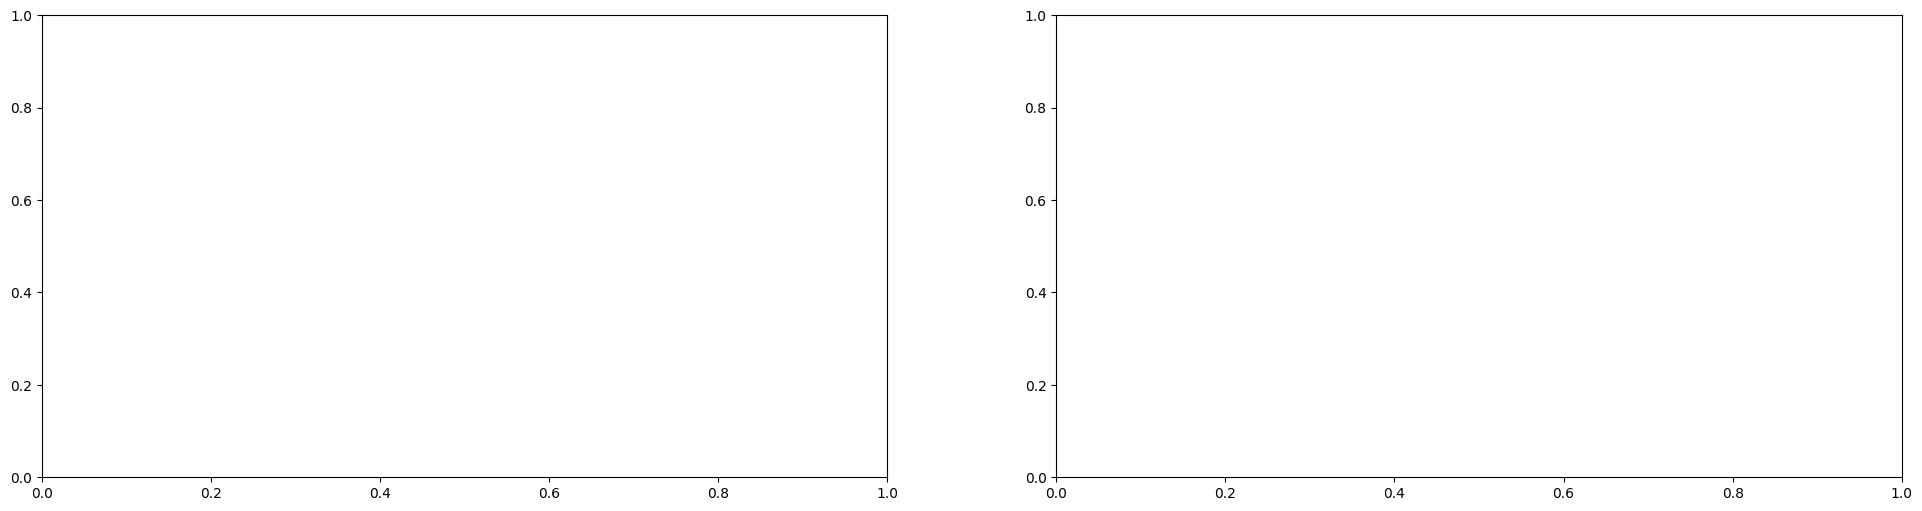

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

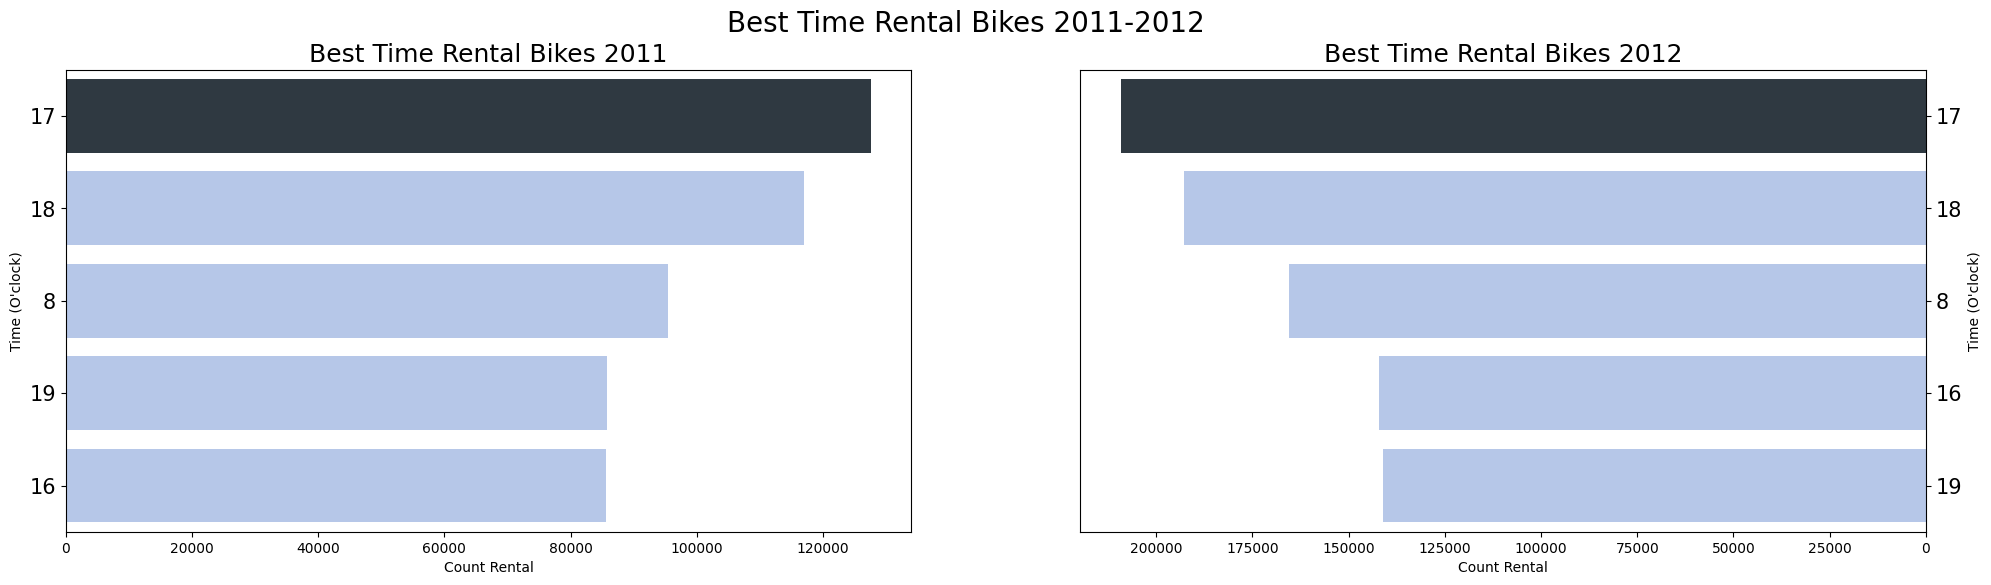

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#2c3944", "#adc4f1", "#adc4f1", "#adc4f1", "#adc4f1"]

sns.barplot(x="cnt", y="hr", data=sum_hour_df_yr_0.sort_values(by="cnt", ascending=False).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Time (O'clock)")
ax[0].set_xlabel("Count Rental")
ax[0].set_title("Best Time Rental Bikes 2011", loc="center", fontsize=18)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="cnt", y="hr", data=sum_hour_df_yr_1.sort_values(by="cnt", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Time (O'clock)")
ax[1].set_xlabel("Count Rental")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Best Time Rental Bikes 2012", loc="center", fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle("Best Time Rental Bikes 2011-2012", fontsize=20)
plt.show()

#### Kesimpulan

Berdasarkan visual di atas, kita dapat lihat bahwa pada pukul 17.00 merupakan jam-jam yang paling laris. Baik pada tahun 2011 maupun tahun 2012.

## Conclusion

### 1. Bagaimana Performa Perentalan sepeda dalam beberapa bulan terakhir berdasarkan type pelanggan?

Peningkatan peminjaman sepeda terlihat pada tahun 2012. Pelanggan casual lebih aktif dari Mei hingga September (musim panas), dengan penurunan tajam saat musim dingin tiba dan titik terendah berada di musim semi. Pelanggan member lebih aktif dari Agustus hingga Oktober (musim gugur) dan juga mengalami penurunan selama musim salju dan musim semi.

### 2. Pada musim apa orang-orang sering menggunakan sepeda ?

Jumlah peminjaman sepeda paling tinggi terjadi pada musim gugur selama tahun 2011-2012, diikuti oleh musim panas. Temuan ini sesuai dengan visualisasi sebelumnya yang menunjukkan tingkat peminjaman sepeda tertinggi selama musim panas dan gugur.

### 3. Pukul berapa terjadi fluktuasi tingkat penyewaan?

Berdasarkan visual di atas, kita dapat lihat bahwa pada pukul 17.00 merupakan jam-jam yang paling laris. Baik pada tahun 2011 maupun tahun 2012.